#Análise Exploratória de Dados

Neste notebook usaremos uma pesquisa realizada ao longo do ano de 2016 pelo o FreeCodeCamp. A pesquisa está relacionada ao mercado de trabaho de TI, sobretudo, nos EUA. Mais de 15000 pessoas responderam ao New Coder Survey 2016. Nosso objetivo foi fazer uma investigação dos dados para entender melhor a população da amostra e também fazer inferências sobre como adultos estão aprendendo a programar.

Os dados foram extraídos de https://github.com/freeCodeCamp/2016-new-coder-survey/tree/master/clean-data



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mat
import seaborn as sns
import matplotlib.pyplot as plt
import colorsys
plt.style.use('seaborn-talk')
import warnings
warnings.filterwarnings("ignore")


In [ ]:
dados = pd.read_csv("/content/drive/MyDrive/FCC/2016-FCC-New-Coders-Survey-Data.csv", sep = ',', low_memory=False)

In [ ]:
print(dados.head())

    Age  AttendedBootcamp  ...              SchoolMajor  StudentDebtOwe
0  28.0               0.0  ...                      NaN         20000.0
1  22.0               0.0  ...                      NaN             NaN
2  19.0               0.0  ...                      NaN             NaN
3  26.0               0.0  ...  Cinematography And Film          7000.0
4  20.0               0.0  ...                      NaN             NaN

[5 rows x 113 columns]


In [ ]:
#dados

In [ ]:
print(dados.describe())

                Age  AttendedBootcamp  ...  ResourceYouTube  StudentDebtOwe
count  13613.000000      15380.000000  ...            121.0     3514.000000
mean      29.175421          0.061964  ...              1.0    34556.143711
std        9.017716          0.241097  ...              0.0    54423.139781
min       10.000000          0.000000  ...              1.0        0.000000
25%       23.000000          0.000000  ...              1.0    10000.000000
50%       27.000000          0.000000  ...              1.0    20000.000000
75%       33.000000          0.000000  ...              1.0    40000.000000
max       86.000000          1.000000  ...              1.0  1000000.000000

[8 rows x 85 columns]


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15620 entries, 0 to 15619
Columns: 113 entries, Age to StudentDebtOwe
dtypes: float64(85), object(28)
memory usage: 13.5+ MB


In [ ]:
dados.shape

(15620, 113)

In [ ]:
dados.dtypes

Age                     float64
AttendedBootcamp        float64
BootcampFinish          float64
BootcampFullJobAfter    float64
BootcampLoanYesNo       float64
                         ...   
ResourceW3Schools       float64
ResourceYouTube         float64
SchoolDegree             object
SchoolMajor              object
StudentDebtOwe          float64
Length: 113, dtype: object

In [ ]:
list(dados)

['Age',
 'AttendedBootcamp',
 'BootcampFinish',
 'BootcampFullJobAfter',
 'BootcampLoanYesNo',
 'BootcampMonthsAgo',
 'BootcampName',
 'BootcampPostSalary',
 'BootcampRecommend',
 'ChildrenNumber',
 'CityPopulation',
 'CodeEventBootcamp',
 'CodeEventCoffee',
 'CodeEventConferences',
 'CodeEventDjangoGirls',
 'CodeEventGameJam',
 'CodeEventGirlDev',
 'CodeEventHackathons',
 'CodeEventMeetup',
 'CodeEventNodeSchool',
 'CodeEventNone',
 'CodeEventOther',
 'CodeEventRailsBridge',
 'CodeEventRailsGirls',
 'CodeEventStartUpWknd',
 'CodeEventWomenCode',
 'CodeEventWorkshop',
 'CommuteTime',
 'CountryCitizen',
 'CountryLive',
 'EmploymentField',
 'EmploymentFieldOther',
 'EmploymentStatus',
 'EmploymentStatusOther',
 'ExpectedEarning',
 'FinanciallySupporting',
 'Gender',
 'HasChildren',
 'HasDebt',
 'HasFinancialDependents',
 'HasHighSpdInternet',
 'HasHomeMortgage',
 'HasServedInMilitary',
 'HasStudentDebt',
 'HomeMortgageOwe',
 'HoursLearning',
 'ID.x',
 'ID.y',
 'Income',
 'IsEthnicMinorit

In [ ]:
paises = dados.copy()

In [ ]:
dados['CountryLive'].value_counts()

United States of America    6265
India                        981
United Kingdom               618
Canada                       542
Brazil                       269
                            ... 
Palestine                      1
Andorra                        1
Bermuda                        1
Martinique                     1
Monaco                         1
Name: CountryLive, Length: 156, dtype: int64

Text(0.5, 0, 'Países')

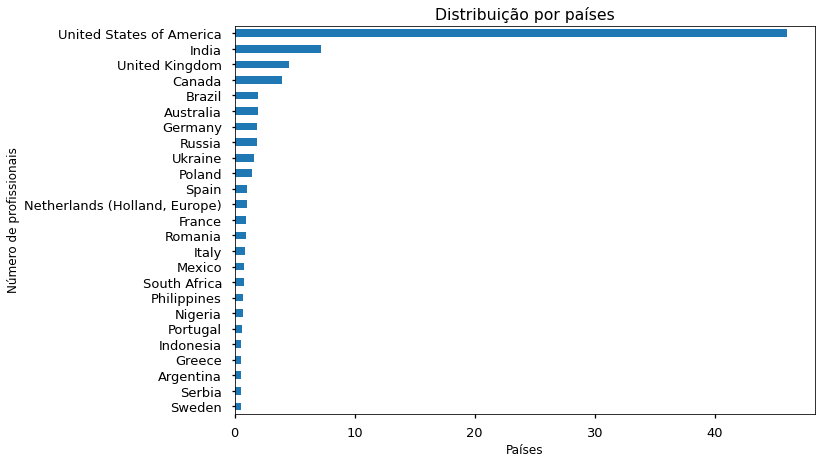

In [ ]:
paises = dados['CountryLive'].value_counts(normalize=True) * 100
#sns.set(style="darkgrid")
#sns.barplot(carreira.values, carreira.index, alpha=1)
grafico_copaisas = paises[:25]
grafico_copaisas = grafico_copaisas.sort_values(ascending=True).plot.barh()
plt.title('Distribuição por países')
plt.ylabel('Número de profissionais', fontsize=12)
plt.xlabel('Países', fontsize=12)

#Qual a distribuição de idade dos participantes da pesquisa?


In [ ]:
dados.Age.mean()

29.17542055388232

In [ ]:
dados.Age.median()

27.0

In [ ]:
dados.Age.mode()

0    25.0
dtype: float64

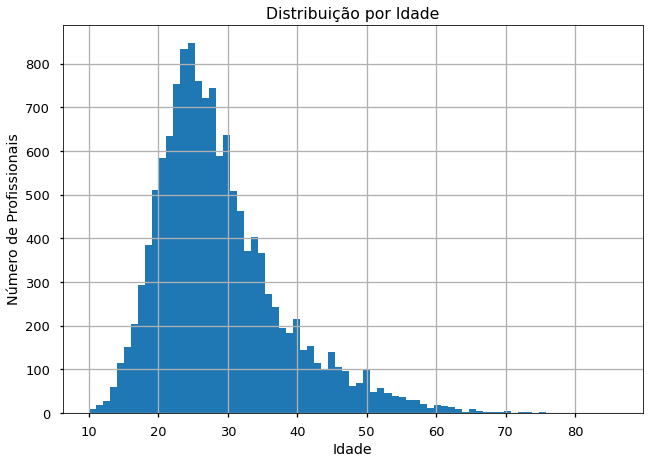

In [ ]:
dados.Age.hist(bins=75)

plt.xlabel("Idade")
plt.ylabel("Número de Profissionais")
plt.title("Distribuição por Idade")
plt.show()

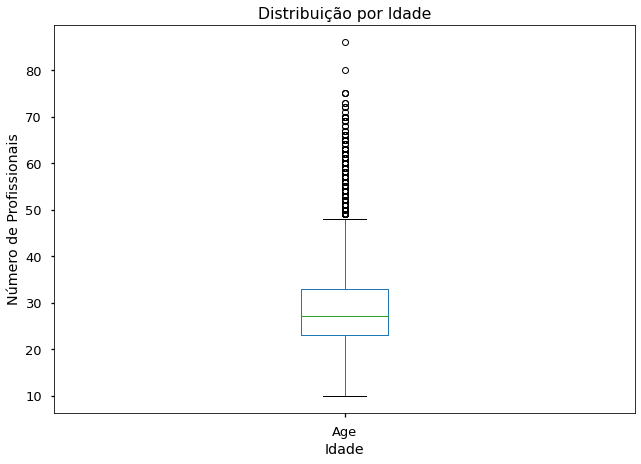

In [ ]:
box = dados.Age.plot.box()

plt.xlabel("Idade")
plt.ylabel("Número de Profissionais")
plt.title("Distribuição por Idade")
plt.show()

A maioria das pessoas da amostra está entre 20 e 30 anos e a idade mais frequente é de 25 anos.

#Qual é a distribuição de gênero dos participantes da pesquisa?

In [ ]:

#generos = dados['Gender'].value_counts(normalize=True)
#sns.set(style="darkgrid")
#sns.barplot(generos.index, generos.values, alpha=1)
#plt.title('Distribuição por gênero')
#plt.ylabel('Número de profissionais', fontsize=12)
#plt.xlabel('Gênero', fontsize=12)
#plt.show()

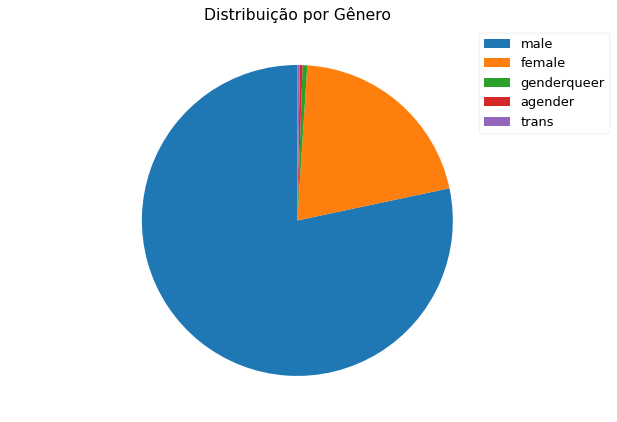

In [ ]:
labels = dados.Gender.value_counts().index

fatias, texto = plt.pie(dados.Gender.value_counts(), startangle = 90)
plt.axes().set_aspect('equal', 'datalim')
plt.legend(fatias, labels, bbox_to_anchor = (1.05,1))
plt.title("Distribuição por Gênero")
plt.show()

#Distribuição de idades por gênero 
O dataset não tem uma quantidade representativa de outros gêneros e a quantidade de homens é cinco vezes maior à das mulheres.




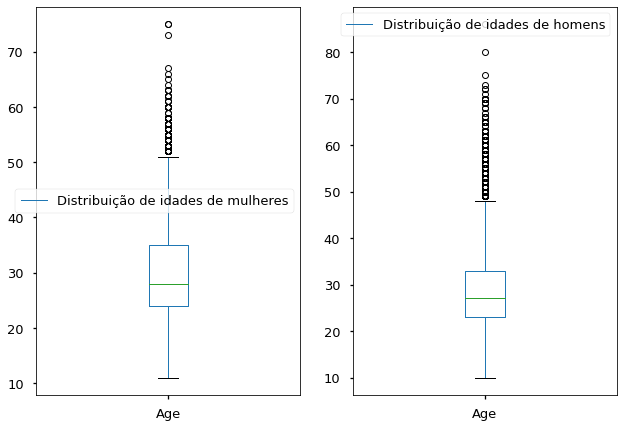

In [ ]:
#retirar outliers e gerar uma comparação em escala semelhante

fig, ax = plt.subplots(ncols=2)
box = dados.Age[dados.Gender == 'male'].plot.box(ax=ax[1])
box = dados.Age[dados.Gender == 'female'].plot.box(ax=ax[0])
ax[1].legend(["Distribuição de idades de homens"])
ax[0].legend(["Distribuição de idades de mulheres"])

In [ ]:
media = np.mean(dados.Age, axis=0)
sd = np.std(dados.Age, axis=0)

In [ ]:
#print(media + 2 * sd)
#print(media - 2 * sd)

limite_baixo = media - 2 * sd
limite_alto = media + 2  * sd

limite_idade_homens = dados.Age[dados.Gender == 'male']
limite_idade_homens 

0        28.0
1        22.0
2        19.0
5        34.0
6        23.0
         ... 
15614    47.0
15615    39.0
15616    27.0
15617    37.0
15618    26.0
Name: Age, Length: 10766, dtype: float64

In [ ]:
#retirando os outliers via IQR

Q1 = dados['Age'].quantile(0.25)
Q3 = dados['Age'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (dados['Age'] >= Q1 - 1.5 * IQR) & (dados['Age'] <= Q3 + 1.5 *IQR)
dados.loc[filter] 
idades_medias = dados.loc[filter]
#idades_medias

In [ ]:
#idades_medias.Age.hist(bins=75)

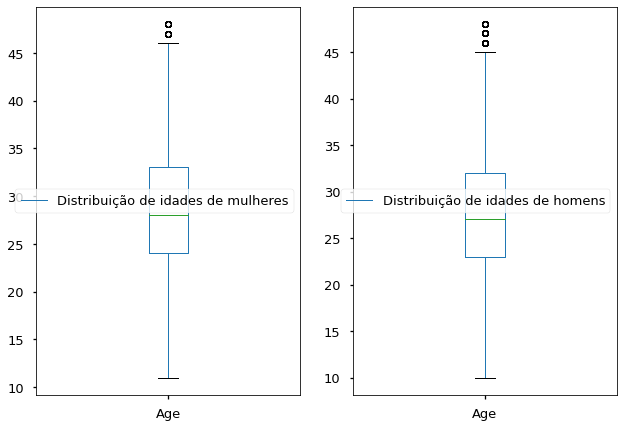

In [ ]:
#remoção de outliers

fig, ax = plt.subplots(ncols=2)
box = idades_medias.Age[dados.Gender == 'male'].plot.box(ax=ax[1])
box = idades_medias.Age[dados.Gender == 'female'].plot.box(ax=ax[0])
ax[1].legend(["Distribuição de idades de homens"])
ax[0].legend(["Distribuição de idades de mulheres"])

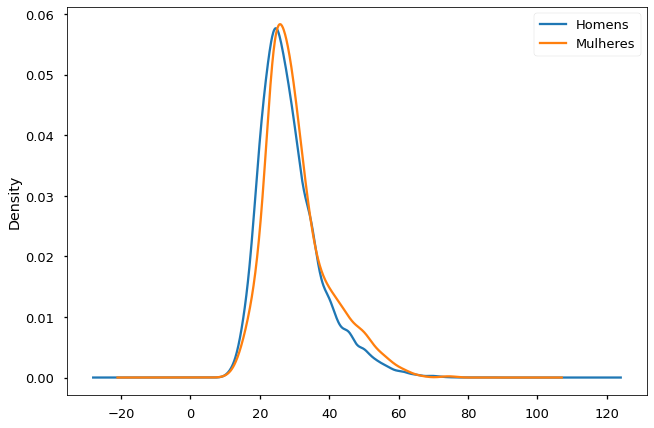

In [ ]:
fig, ax = plt.subplots()
dados[dados.Gender == 'male'].Age.plot.kde(ax=ax)
plot = dados[dados.Gender == 'female'].Age.plot.kde(ax=ax)
legend = ax.legend(['Homens', 'Mulheres'])

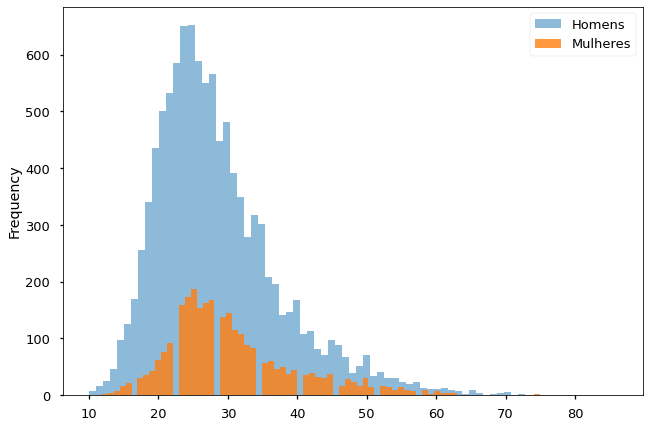

In [ ]:
fig, ax = plt.subplots()
dados[dados.Gender == 'male'].Age.plot.hist(bins=75, ax=ax, alpha=0.5)
dados[dados.Gender == 'female'].Age.plot.hist(bins=75, ax=ax, alpha=0.8)
legend = ax.legend(['Homens', 'Mulheres'])

Quase 80% das pessoas entrevistadas são homens. 



#Quais são as 10 carreiras mais procuradas pelos participantes da pesquisa?





Text(0.5, 0, 'interesse')

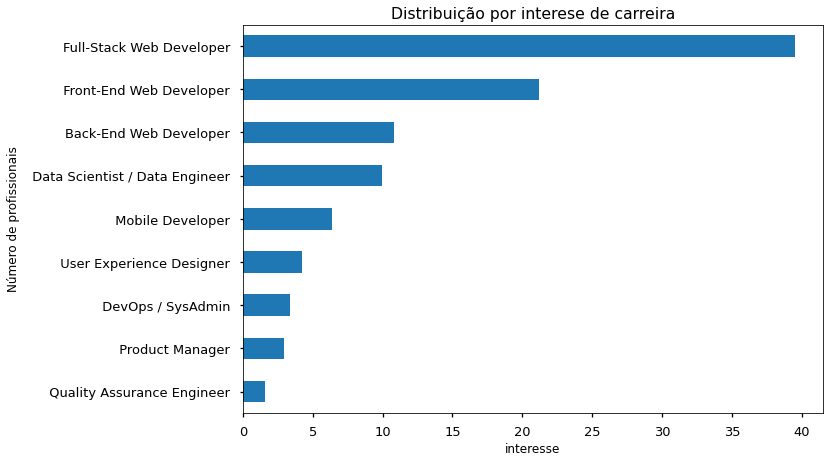

In [ ]:
interesses = dados['JobRoleInterest'].value_counts(normalize=True) * 100
#sns.set(style="darkgrid")
#sns.barplot(interesses.values, interesses.index, alpha=1)
graficointeresses = interesses[:20]
graficointeresses = graficointeresses.sort_values(ascending=True).plot.barh()
plt.title('Distribuição por interese de carreira')
plt.ylabel('Número de profissionais', fontsize=12)
plt.xlabel('interesse', fontsize=12)
#plt.show()

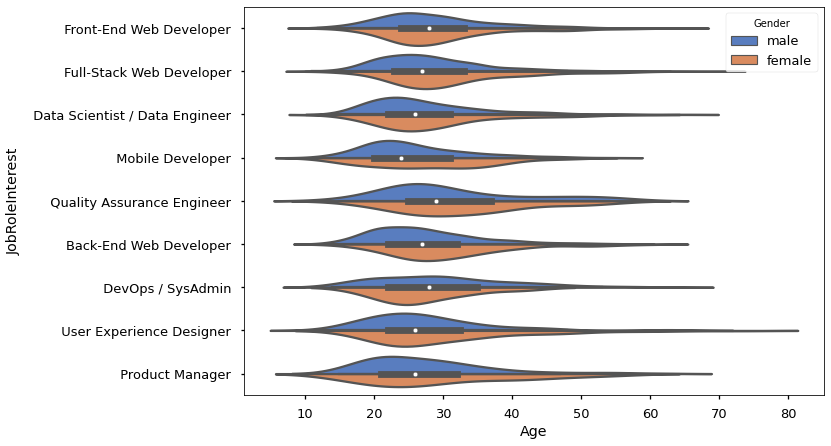

In [ ]:
dadosGenero = dados.query("Gender == 'male' or Gender == 'female'")

grafi = sns.violinplot(x = 'Age', y = 'JobRoleInterest', hue = 'Gender', data = dadosGenero, split = True,  palette="muted", rotation=90)


In [ ]:
#labels = dados.job_pref.value_counts().index
#colors = ['OliveDrab', 'Orange', 'OrangeRed', 'DarkCyan', 'Salmon', 'Sienna', 'Maroon', 'LightSlateGrey', 'DimGray']

#fatias, texto = plt.pie(dados.job_pref.value_counts(), startangle = 90)
#plt.axes().set_aspect('equal', 'datalim')
#plt.legend(fatias, labels, bbox_to_anchor = (1.25, 1))
#plt.title("Interesse Profissional")

#plt.show()

Cerca de 70% das pessoas da amostra gostariam de trabalhar com desenvolvimento web (full stack, front-end ou back-end).

Comparar com o dataset do stackoverflow.

#Distribuição  por profissão

# Quais as áreas de negócio em que os participantes da pesquisa trabalham?




Text(0.5, 0, 'interesse')

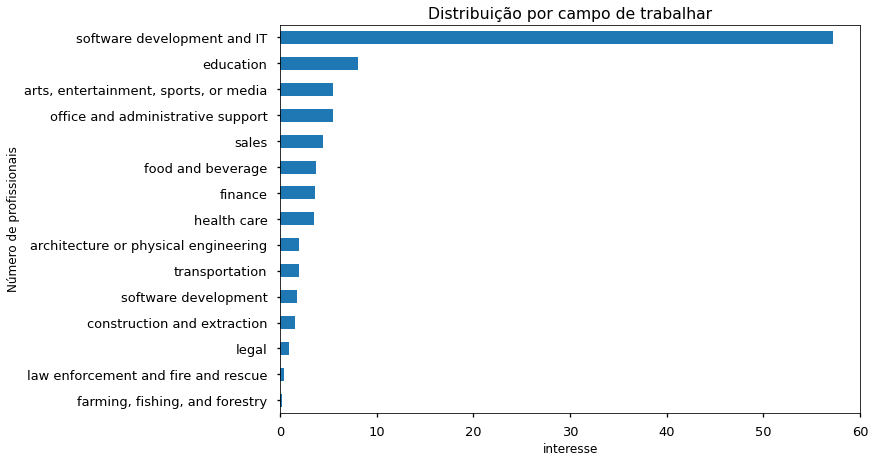

In [ ]:
carreira = dados['EmploymentField'].value_counts(normalize=True) * 100
#sns.set(style="darkgrid")
#sns.barplot(carreira.values, carreira.index, alpha=1)
graficocarreira = carreira[:25]
graficocarreira = graficocarreira.sort_values(ascending=True).plot.barh()
plt.title('Distribuição por campo de trabalhar')
plt.ylabel('Número de profissionais', fontsize=12)
plt.xlabel('interesse', fontsize=12)
#plt.show()

A maioria das pessoas da amostra, trabalha na área de desenvolvimento de software e TI

Nos metadados há dez opções. Nove segmentos e uma opção 'outros', que pode ser preenchida pela pessoa entrevistada.

In [ ]:
#area = dados['EmploymentField'].value_counts(normalize=True)
#sns.set(style="darkgrid")

#sns.barplot(area.index, area.values, alpha=1)
#plt.title('Distribuição por área de atuação')
#plt.ylabel('Número de profissionais', fontsize=12)
#plt.xlabel('Área', fontsize=12)
#plt.show()

#Quais são as preferências de trabalho por idade?



In [ ]:
idades = dados.copy()
bins=[0, 20, 30, 40, 50, 60, 100]

idades['Faixas_de_idade'] = pd.cut(idades['Age'], bins, labels=["< 20", "20-30", "30-40","40-50", "50-60", "> 60"]) 

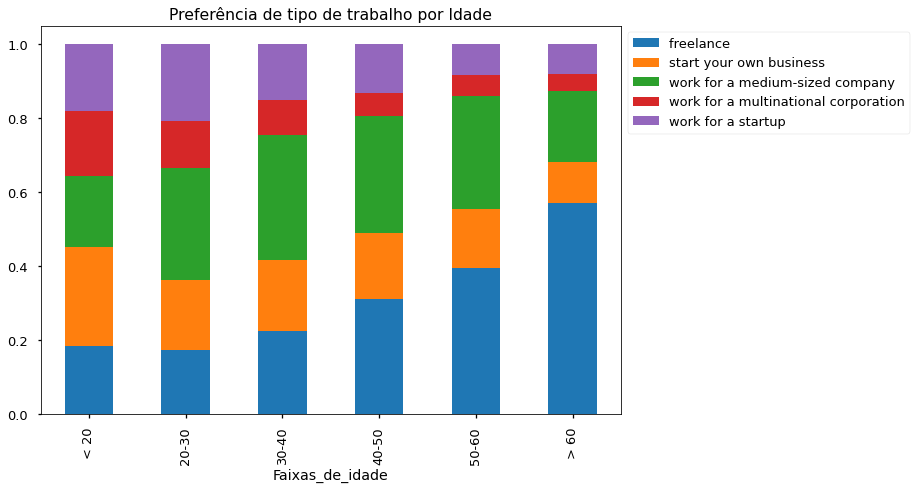

In [ ]:

dados2 = pd.crosstab(idades.Faixas_de_idade, idades.JobPref).apply(lambda r: r/r.sum(), axis=1)

ax1 = dados2.plot(kind = "bar", stacked = True, title = "Preferência de tipo de trabalho por Idade")
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, bbox_to_anchor = (1.51, 1))

À medida que a idade aumenta, o interesse por trabalho 
freelance também aumenta, sendo o modelo preferido por profissionais 
acima de 60 anos. 

Profissionais mais jovens preferem trabalhar em multinacionais, startups ou em seu próprio negócio. 

Profissionais entre 20 e 50 anos 
preferem trabalhar em empresas de médio porte.

In [ ]:
help(pd.crosstab)

# Qual a proporção de pessoas dispostas a mudar de domicílio pela carreira?



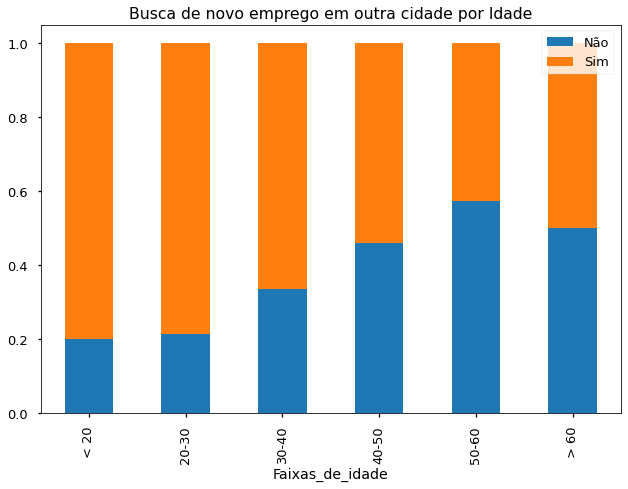

In [ ]:
dados3 = pd.crosstab(idades.Faixas_de_idade, idades.JobRelocateYesNo).apply(lambda r: r/r.sum(), axis = 1)


ax1 = dados3.plot(kind = "bar", stacked = True, title = "Busca de novo emprego em outra cidade por Idade")
lines, labels = ax1.get_legend_handles_labels()


In [ ]:
teste = dados.CountryLive.value_counts()
teste

United States of America    6265
India                        981
United Kingdom               618
Canada                       542
Brazil                       269
                            ... 
Haiti                          1
Martinique                     1
Reunion                        1
Korea North                    1
Monaco                         1
Name: CountryLive, Length: 156, dtype: int64

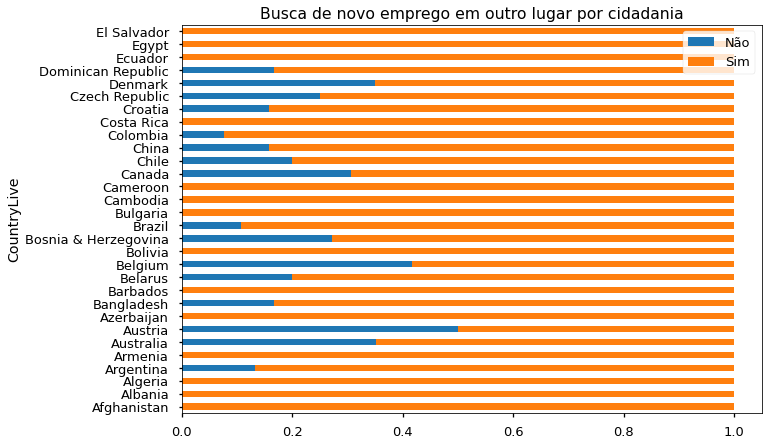

In [ ]:
dados17 = pd.crosstab(dados.CountryLive, dados.JobRelocateYesNo).apply(lambda r: r/r.sum(), axis = 1)

ax1 = dados17[:30].plot(kind = "barh", stacked = True, title = "Busca de novo emprego em outro lugar por cidadania")
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines,["Não", "Sim"], loc = 'best')

A vontade de buscar um novo emprego em outro lugar diminui à medida que a idade aumenta. Quase 80% das pessoas abaixo dos 30 anos estão dispostas a mudar.

#Qual a proporção de pessoas que se sentem sub-empregadas nas suas atuais profissões e optam por aprender a programar?

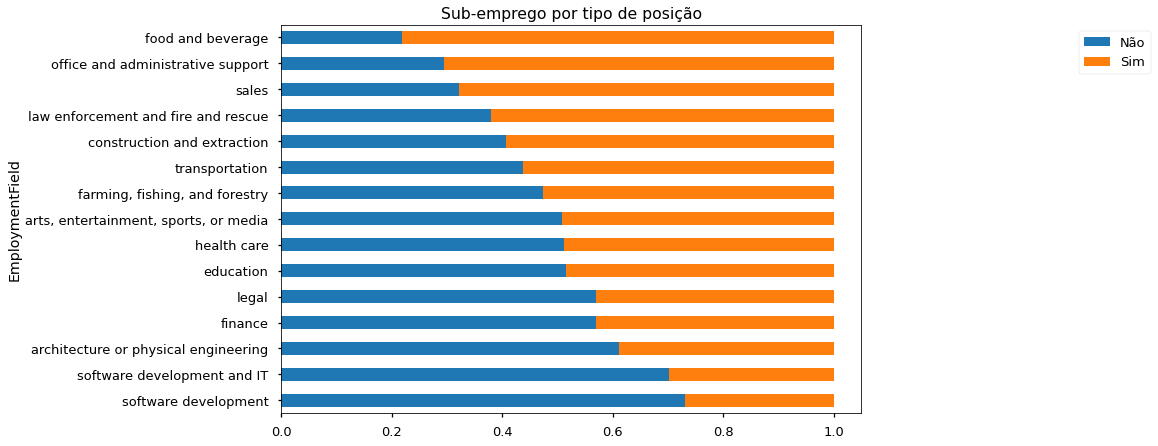

In [ ]:
dados9 = pd.crosstab(dados.EmploymentField,dados.IsUnderEmployed).apply(lambda r: r/r.sum(), axis=1)
dados9 = dados9.sort_values(by=1.0)
ax1 = dados9.plot(kind="barh", stacked=True, title="Sub-emprego por tipo de posição")
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines,["Não", "Sim"], bbox_to_anchor=(1.51, 1))

#Quais as fontes de treinamento mais usadas?

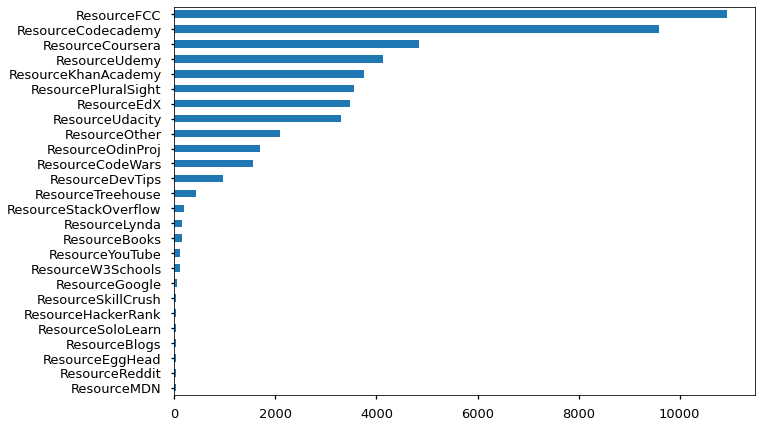

In [ ]:
barras = dados[['ResourceBlogs', 'ResourceBooks', 'ResourceCodeWars','ResourceCodecademy',
'ResourceCoursera', 'ResourceDevTips', 'ResourceEdX', 'ResourceEggHead', 'ResourceFCC',
'ResourceGoogle', 'ResourceHackerRank', 'ResourceKhanAcademy', 'ResourceLynda', 'ResourceMDN',
'ResourceOdinProj', 'ResourceOther', 'ResourcePluralSight', 'ResourceReddit', 'ResourceSkillCrush',
'ResourceSoloLearn', 'ResourceStackOverflow', 'ResourceTreehouse', 'ResourceUdacity', 'ResourceUdemy',
'ResourceW3Schools', 'ResourceYouTube']].count()

graficobarras = barras.sort_values(ascending=True).plot.barh()

#Quais as fontes de treinamento mais usadas de acordo com acesso à internet?

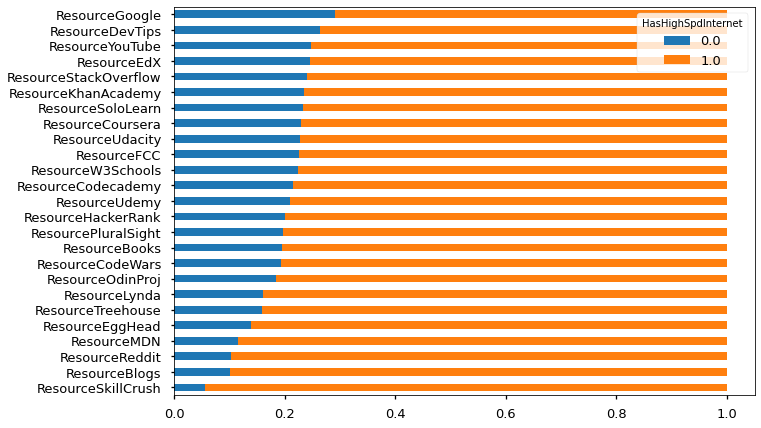

In [ ]:
values = dados.fillna(0)[['ResourceBlogs', 'ResourceBooks', 'ResourceCodeWars', 'ResourceCodecademy',
'ResourceCoursera', 'ResourceDevTips', 'ResourceEdX', 'ResourceEggHead', 'ResourceFCC', 'ResourceGoogle',
'ResourceHackerRank', 'ResourceKhanAcademy', 'ResourceLynda', 'ResourceMDN', 'ResourceOdinProj',
'ResourceOther', 'ResourcePluralSight', 'ResourceReddit', 'ResourceSkillCrush', 'ResourceSoloLearn',
'ResourceStackOverflow', 'ResourceTreehouse', 'ResourceUdacity', 'ResourceUdemy', 'ResourceW3Schools',
'ResourceYouTube', 'HasHighSpdInternet']].groupby('HasHighSpdInternet')
values = values.sum()

values = values.apply(lambda x: x/sum(x))
values = values.unstack().unstack()
values = values.sort_values(by=values.columns[0], axis=0)

plot = values.plot.barh(stacked=True)

#Quais os salários mais frequentes após passar por um bootcamp?

In [ ]:
dados.BootcampPostSalary.describe().round(2)

count       330.00
mean      63740.51
std       26347.20
min        6000.00
25%       50000.00
50%       60000.00
75%       77000.00
max      200000.00
Name: BootcampPostSalary, dtype: float64

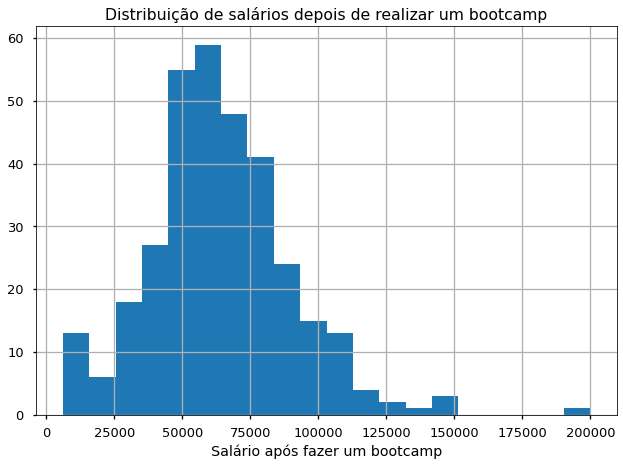

In [ ]:
#salario = dados['BootcampPostSalary'].value_counts()
#graficosalario = dados['BootcampPostSalary'].plot.hist()
dados.BootcampPostSalary.hist(bins=20)
#dados.set_xlabel('Salário após fazer um bootcamp')
#dados.set_title('Distribuição de salários depois de realizar um bootcamp')
plt.xlabel('Salário após fazer um bootcamp')
#plt.ylabel('')
plt.title('Distribuição de salários depois de realizar um bootcamp')
plt.show()

#Quais as formações mais comuns entre as pessoas entrevistadas?

Text(0.5, 0, 'Nome da formação')

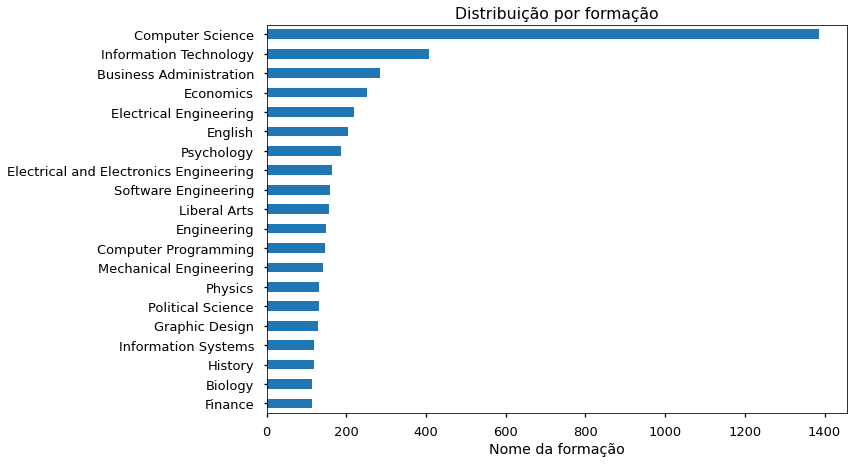

In [ ]:

formacoes = dados['SchoolMajor'].value_counts()
graficoformacoes = formacoes[:20]
graficoformacoes = graficoformacoes.sort_values(ascending=True).plot.barh()
graficoformacoes.set_title('Distribuição por formação')
graficoformacoes.set_xlabel('Nome da formação')

Text(0.5, 1.0, 'Distribuição por graduação')

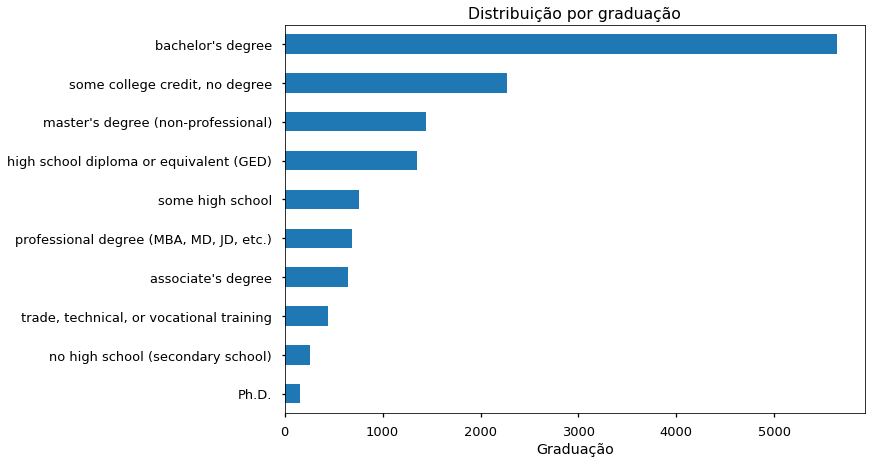

In [ ]:

graduacoes = dados['SchoolDegree'].value_counts()
graficograduacoes = graduacoes[:10]
graficograduacoes = graficograduacoes.sort_values(ascending=True).plot.barh()
graficograduacoes.set_xlabel('Graduação')
graficograduacoes.set_title('Distribuição por graduação')

# Qual a relação entre o número de horas disponíveis para se dedicar e a idade?
Aparentemente a idade dos profissionais afeta a quantidade de horas dedicadas à capacitação e treinamento pessoal, mas não de forma muito significativa.


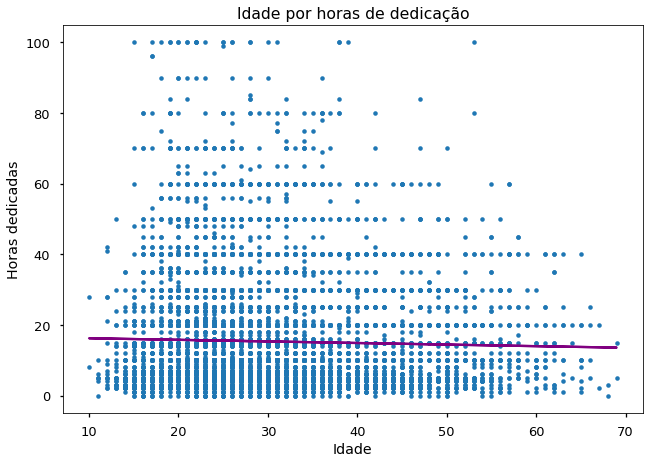

In [ ]:

dados4 = dados.copy()
dados4 = dados4.dropna(subset=["HoursLearning"])
dados4 = dados4[dados['Age'].isin(range(0,70))]

x = dados4.Age
y = dados4.HoursLearning

m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-', color = "purple")
plt.xlabel("Idade")
plt.ylabel("Horas dedicadas")
plt.title("Idade por horas de dedicação")
plt.show()

#Quais os grupos etários em que é mais comum ter filhos?

In [ ]:
list(dados)

In [ ]:
idades = dados.copy()
bins=[0, 20, 30, 40, 50, 60, 100]

idades['Faixas_de_idade'] = pd.cut(idades['Age'], bins, labels=["< 20", "20-30", "30-40", "40-50", "50-60", "< 60"]) 

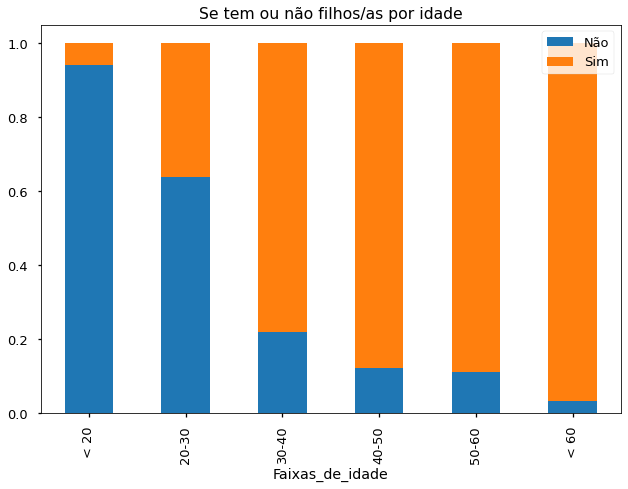

In [ ]:
dados13 = pd.crosstab(idades.Faixas_de_idade, idades.HasChildren).apply(lambda r: r/r.sum(), axis = 1)


ax1 = dados13.plot(kind = "bar", stacked = True, title = "Se tem ou não filhos/as por idade")
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines,["Não", "Sim"], loc = 'best')

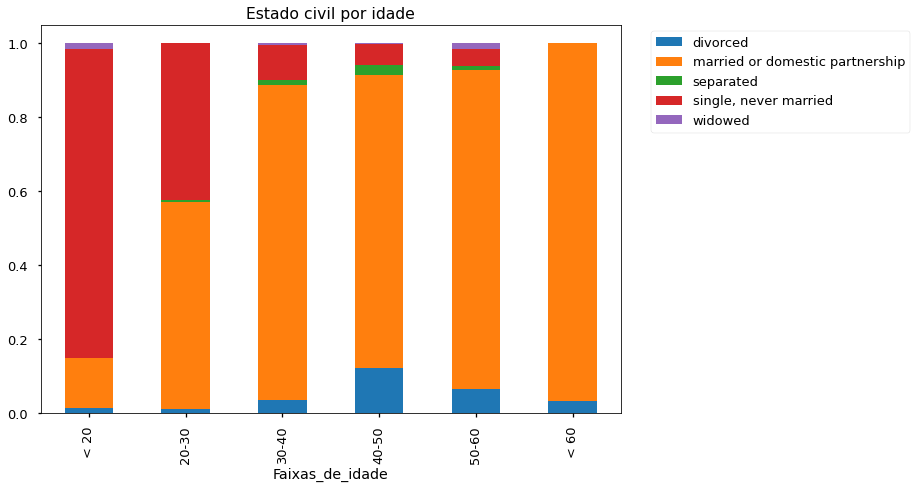

In [ ]:

dados14 = pd.crosstab(idades.Faixas_de_idade, idades.MaritalStatus).apply(lambda r: r/r.sum(), axis = 1)

ax1 = dados14.plot(kind = "bar", stacked = True, title = "Estado civil por idade")
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, bbox_to_anchor = (1.51, 1))


# Qual a relação entre a idade e ter ou não dependentes financeiros?

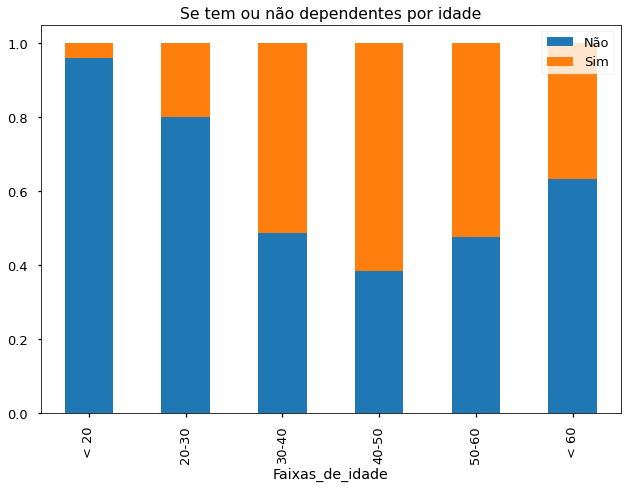

In [ ]:
dados17 = pd.crosstab(idades.Faixas_de_idade, idades.HasFinancialDependents).apply(lambda r: r/r.sum(), axis = 1)


ax1 = dados17.plot(kind = "bar", stacked = True, title = "Se tem ou não dependentes por idade")
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines,["Não", "Sim"], loc = 'best')

# Qual a relação entre investimento em capacitação e expectativa salarial?
Os profissionais que investem tempo e dinheiro em capacitação e 
treinamento, em geral, conseguem salários mais altos, embora alguns 
profisisonais esperem altos salários, investindo pouco em treinamento.


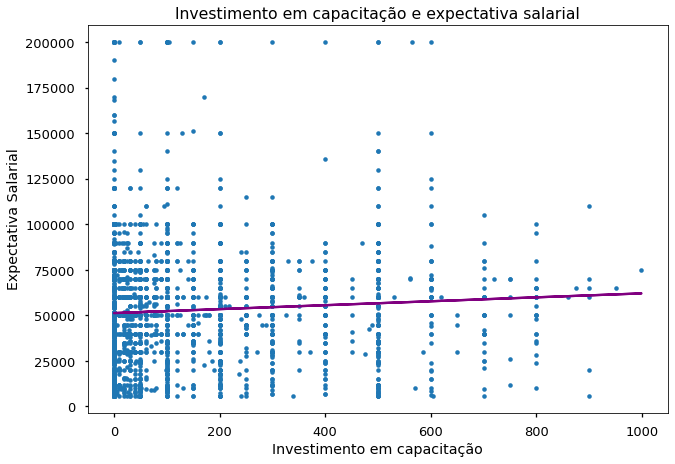

In [ ]:

dados5 = dados.copy()
dados5 = dados5.dropna(subset=["ExpectedEarning"])
dados5 = dados5[dados['MoneyForLearning'].isin(range(0,1000))]

x = dados5.MoneyForLearning
y = dados5.ExpectedEarning

m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-', color = "purple")
plt.xlabel("Investimento em capacitação")
plt.ylabel("Expectativa Salarial")
plt.title("Investimento em capacitação e expectativa salarial")
plt.show()


#Qual a proporção de pessoas que possuem dívida estudantil por idade?

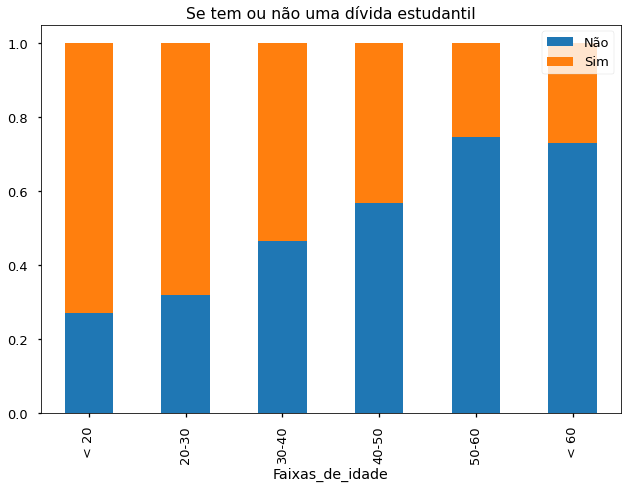

In [ ]:
dados15 = pd.crosstab(idades.Faixas_de_idade, idades.HasStudentDebt).apply(lambda r: r/r.sum(), axis = 1)


ax1 = dados15.plot(kind = "bar", stacked = True, title = "Se tem ou não uma dívida estudantil")
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines,["Não", "Sim"], loc = 'best')

#Qual a proporção de pessoas que possuem algum tipo de dívida por idade?

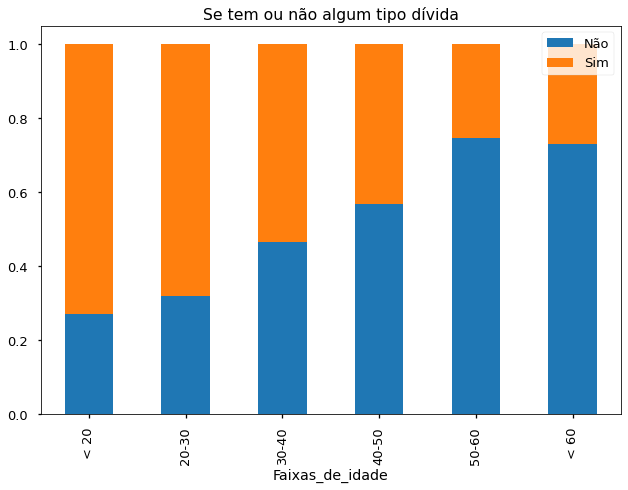

In [ ]:
dados16 = pd.crosstab(idades.Faixas_de_idade, idades.HasDebt).apply(lambda r: r/r.sum(), axis = 1)


ax1 = dados15.plot(kind = "bar", stacked = True, title = "Se tem ou não algum tipo dívida")
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines,["Não", "Sim"], loc = 'best')

#Qual a relação entre a renda e investimento em capacitação?


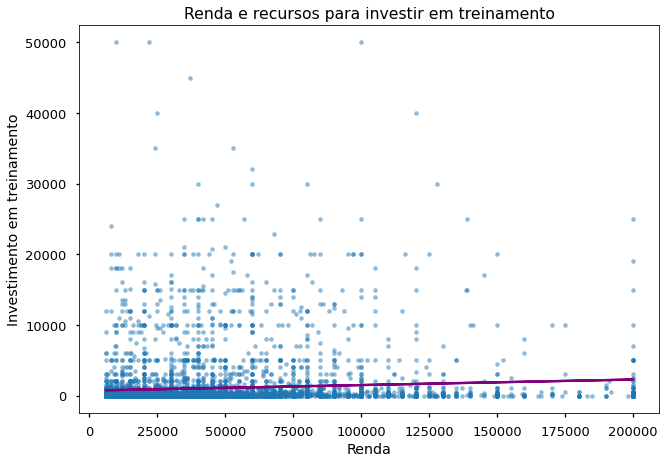

In [ ]:
dados6 = dados.copy()
dados6 = dados6.dropna(subset=["Income"])
dados6 = dados6[dados['MoneyForLearning'].isin(range(0,60000))]

x = dados6.Income
y = dados6.MoneyForLearning

m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.', alpha=0.5)
plt.plot(x, m*x + b, '-', color="purple")
plt.title("Renda e recursos para investir em treinamento")
plt.xlabel("Renda")
plt.ylabel("Investimento em treinamento")
plt.show()

#Qual a relação entre o número de horas dedicadas e a expectativa salarial?
A quantidade de horas gastas aprendendo não está correlacionada com o ganho esperado. Assim, quem espera ter uma renda maior não gasta necessariamente mais horas aprendendo para atingir essa meta.

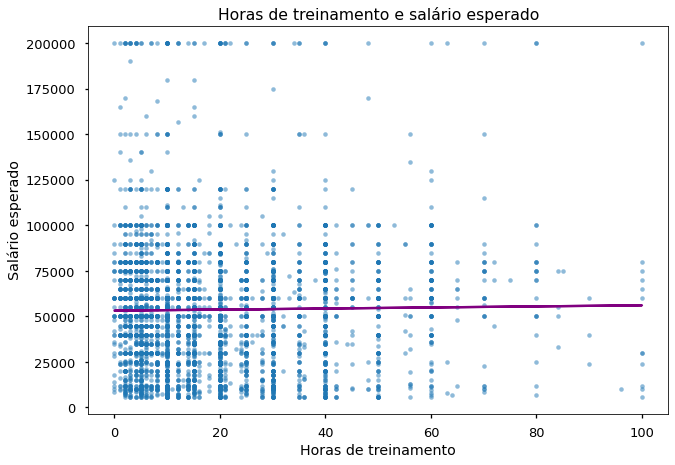

In [ ]:
dados7 = dados.copy()
dados7 = dados7.dropna(subset=["HoursLearning"])
dados7 = dados7.dropna(subset=["ExpectedEarning"])

x = dados7.HoursLearning
y = dados7.ExpectedEarning

m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.', alpha=0.5)
plt.plot(x, m*x + b, '-', color="purple")
plt.xlabel("Horas de treinamento")
plt.ylabel("Salário esperado")
plt.title("Horas de treinamento e salário esperado")
plt.show()

#Qual a relação entre a quantidade de meses programando e as horas de treinamento?

Pessoas que já program há muito tempo tendem a gastar menos horas aprendendo, provavelmente porque é mais fácil dominar outras tecnologias de desenvolvimento quando se tem algum conhecimento de programação.

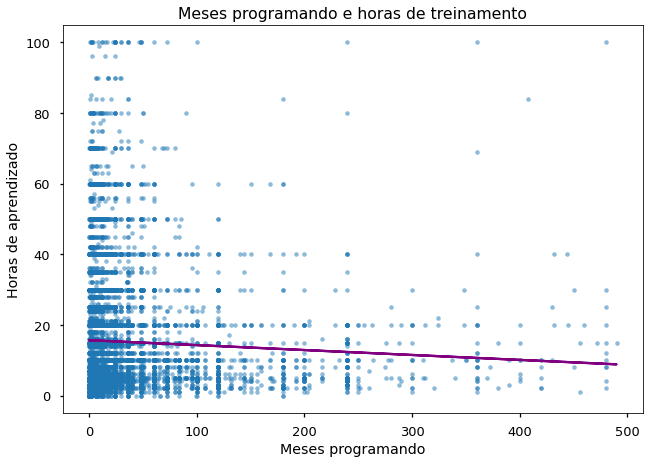

In [ ]:
dados8 = dados.copy()
dados8 = dados8.dropna(subset=["HoursLearning"])
dados8 = dados8[dados['MonthsProgramming'].isin(range(0,500))]

x = dados8.MonthsProgramming
y = dados8.HoursLearning

m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.', alpha=0.5)
plt.plot(x, m*x + b, '-', color="purple")
plt.xlabel("Meses programando")
plt.ylabel("Horas de aprendizado")
plt.title("Meses programando e horas de treinamento")
plt.show()

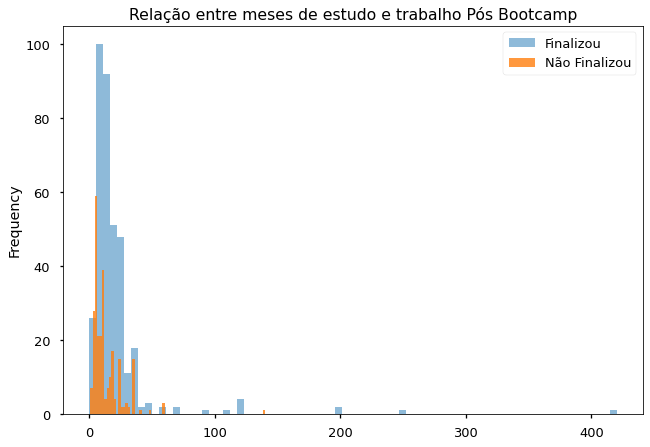

In [ ]:
fig, ax = plt.subplots()
dados[dados.BootcampFullJobAfter == 1].MonthsProgramming.plot.hist(bins=75, ax=ax, alpha=0.5)
dados[dados.BootcampFullJobAfter == 0].MonthsProgramming.plot.hist(bins=75, ax=ax, alpha=0.8)
ax.set_title('Relação entre meses de estudo e trabalho Pós Bootcamp')
legend = ax.legend(['Finalizou', 'Não Finalizou'])

In [ ]:
#sns.FacetGrid(col='CityPopulation', hue='EmploymentField', size=6, col_wrap=2, data=dados).map(plt.scatter, 'Age', 'Income').add_legend()


#Qual a relação entre tempo de estudo semanal e remuneração obtida pelos participantes da pesquisa?

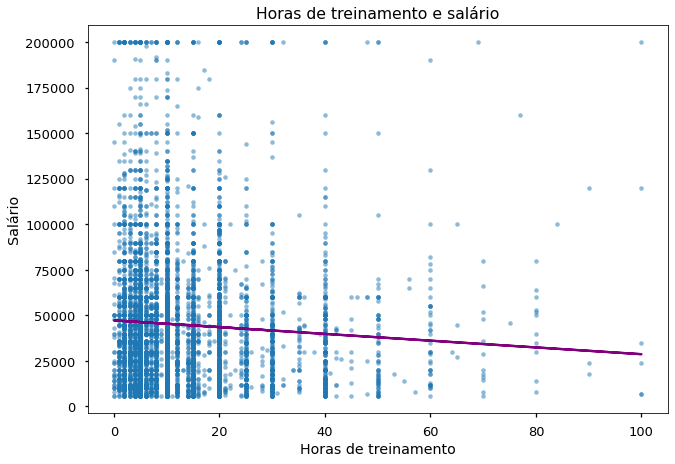

In [ ]:
dados12 = dados.copy()
dados12 = dados12.dropna(subset=["HoursLearning"])
dados12 = dados12.dropna(subset=["Income"])

x = dados12.HoursLearning
y = dados12.Income

m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.', alpha=0.5)
plt.plot(x, m*x + b, '-', color="purple")
plt.xlabel("Horas de treinamento")
plt.ylabel("Salário")
plt.title("Horas de treinamento e salário")
plt.show()

#Qual a relação entre o salário atual e salario esperado antes de terminar o bootcamp?

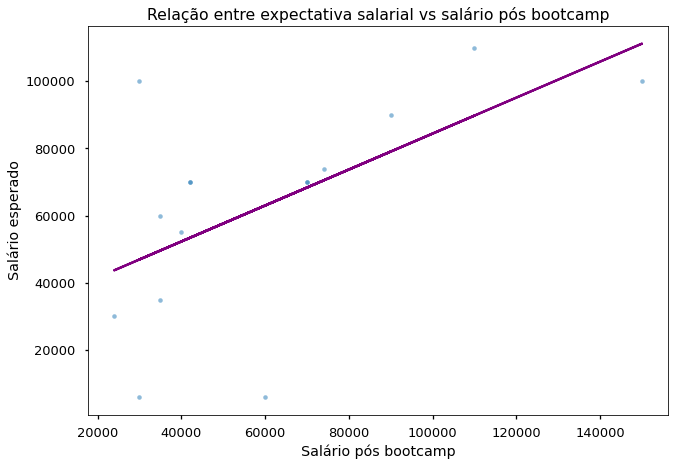

In [ ]:
dados10 = dados.copy()
dados10 = dados10.dropna(subset=["BootcampPostSalary"])
dados10 = dados10[dados['ExpectedEarning'].isin(range(0,200000))]

x = dados10.BootcampPostSalary
y = dados10.ExpectedEarning

m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.', alpha=0.5)
plt.plot(x, m*x + b, '-', color="purple")
plt.xlabel("Salário pós bootcamp")
plt.ylabel("Salário esperado")
plt.title("Relação entre expectativa salarial vs salário pós bootcamp")
plt.show()


#Pessoas de TI dedicam mais horas de estudo que pessoas que não são formadas na área?

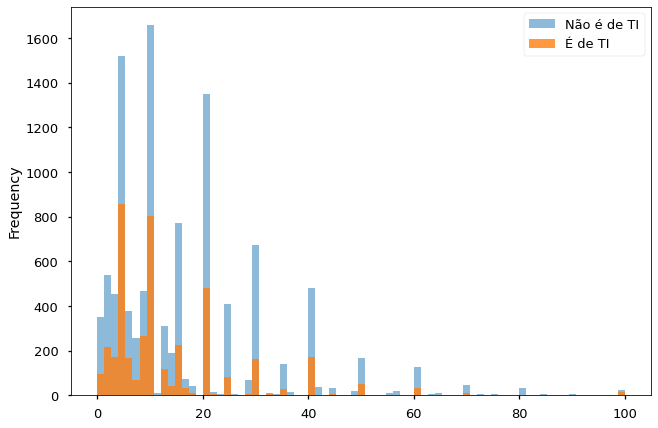

In [ ]:
fig, ax = plt.subplots()
dados[dados.IsSoftwareDev == 0].HoursLearning.plot.hist(bins=75, ax=ax, alpha=0.5)
dados[dados.IsSoftwareDev == 1].HoursLearning.plot.hist(bins=75, ax=ax, alpha=0.8)
legend = ax.legend(['Não é de TI', 'É de TI'])

#Quais as idades das pessoas que conseguem obter emprego após fazer um bootcamp?

In [ ]:
dados.Age.describe()

count    13613.000000
mean        29.175421
std          9.017716
min         10.000000
25%         23.000000
50%         27.000000
75%         33.000000
max         86.000000
Name: Age, dtype: float64

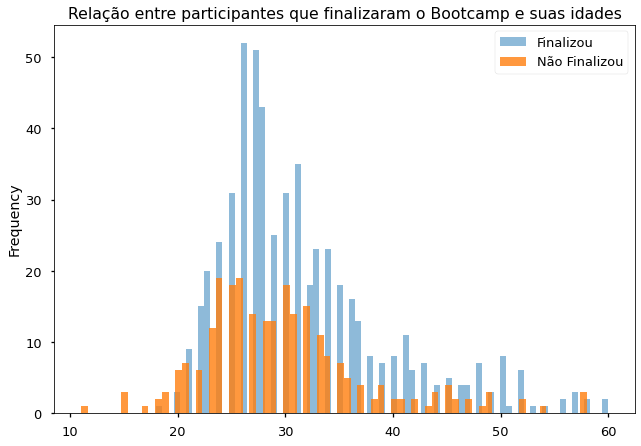

In [ ]:
#Relação entre Finalização do bootcamp VS idade
fig, ax = plt.subplots()
dados[dados.BootcampFinish == 1].Age.plot.hist(bins=75, ax=ax, alpha=0.5)
dados[dados.BootcampFinish == 0].Age.plot.hist(bins=75, ax=ax, alpha=0.8)
ax.set_title('Relação entre participantes que finalizaram o Bootcamp e suas idades')
legend = ax.legend(['Finalizou', 'Não Finalizou'])

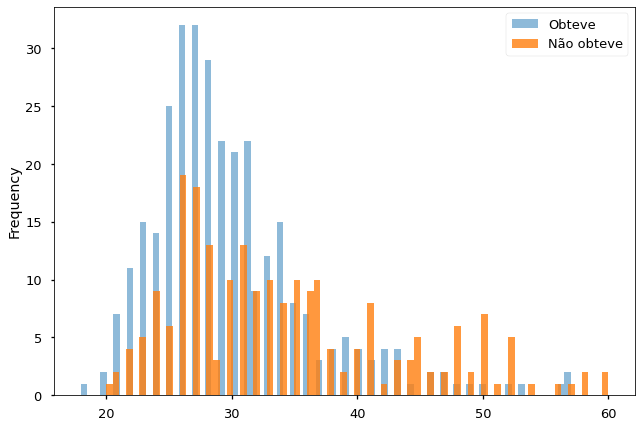

In [ ]:
fig, ax = plt.subplots()
dados[dados.BootcampFullJobAfter == 1].Age.plot.hist(bins=75, ax=ax, alpha=0.5)
dados[dados.BootcampFullJobAfter == 0].Age.plot.hist(bins=75, ax=ax, alpha=0.8)
legend = ax.legend(['Obteve', 'Não obteve'])

In [ ]:
percent = dados.BootcampFullJobAfter.value_counts(normalize=True) * 100

percent.round(2)

1.0    58.43
0.0    41.57
Name: BootcampFullJobAfter, dtype: float64

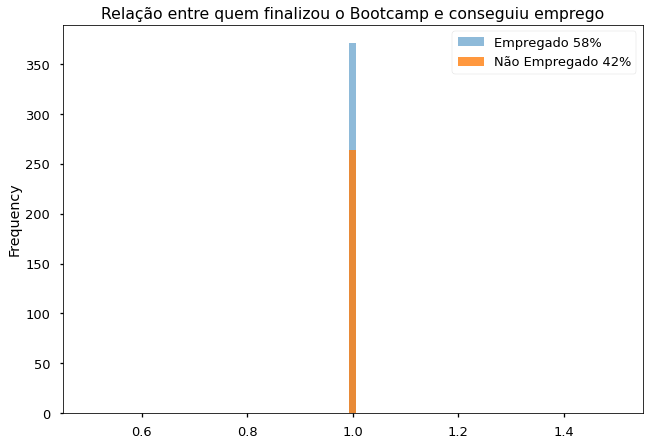

In [ ]:
#relação entre pessoas que finalizaram o bootcamp e conseguiu emprego
fig, ax = plt.subplots()
dados[dados.BootcampFullJobAfter == 1].BootcampFinish.plot.hist(bins=75, ax=ax, alpha=0.5)
dados[dados.BootcampFullJobAfter == 0].BootcampFinish.plot.hist(bins=75, ax=ax, alpha=0.8)
ax.set_title('Relação entre quem finalizou o Bootcamp e conseguiu emprego')
legend = ax.legend(['Empregado 58%', 'Não Empregado 42%'])